# Inferences using fine-tuned BERT models for Italian NER   

We test the pre-trained BERT models fine-tuned on Italian labeled data for NER on:
  - a **sample sentence**
  - sentences from the **validation set** of the Italian [Wikineural Dataset](https://github.com/Babelscape/wikineural/tree/master/data/wikineural/it)
  - **sentences predicted** by the pre-trained model **wav2vec2-xls-r fine-tuned on Italian data for ASR**.

The **entity categories** are encoded as illustrated in the following line:  
```
{'O': 0, 'B-PER': 1, 'I-PER': 2, 'B-ORG': 3, 'I-ORG': 4, 'B-LOC': 5, 'I-LOC': 6, 'B-MISC': 7, 'I-MISC': 8}
```

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load the Validation Set 

In [ ]:
%%capture
! pip install datasets transformers seqeval
from datasets import load_dataset, load_metric, concatenate_datasets
from transformers import pipeline, AutoTokenizer, AutoModel, BertTokenizer, BertModel
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

datasets = load_dataset("Babelscape/wikineural")
val_dataset = datasets["val_it"]

In [ ]:
# ner tags in the Dataset
label_list = ['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']
labels_vocab = {'O': 0, 'B-PER': 1, 'I-PER': 2, 'B-ORG': 3, 'I-ORG': 4, 'B-LOC': 5, 'I-LOC': 6, 'B-MISC': 7, 'I-MISC': 8}
labels_vocab_reverse = {v:k for k,v in labels_vocab.items()}

## a sample sentence
Here we pass to the fine-tuned model **bert-NER-base-ita** a sample sentence which contains: a personal name, a noun of a location, a noun of an organization/institution. 

The sentence is passed to the model:
- cased and with punctuation, 
- and uncased and without punctuation. 

In [ ]:
#tokenizer = AutoTokenizer.from_pretrained(/bert-NER-base-multi/checkpoint-5525) 

tokenizer = AutoTokenizer.from_pretrained("/bert-NER-base-ita/checkpoint-11050") 
model = AutoModel.from_pretrained('/bert-NER-base-ita/checkpoint-11050')
#model.to("cuda")

text = "ho fatto una passegiata al parco lungo l'Adige e ho incontrato Sara, stava per entrare all'Università"

ner_pipeline = pipeline(task='ner', model='/bert-NER-base-ita/checkpoint-11050', tokenizer = AutoTokenizer.from_pretrained("/content/drive/MyDrive/MACHINE_LEARNING/SoSe_project/wikineural-ita-ner2/checkpoint-11050") )
result_ = ner_pipeline(text)
print(result_)
d={}
for el in result_:
  d[el['entity']]= [ el['score'] ]
  print(el['word'], el['entity'], el['score'])

df= pd.DataFrame.from_dict(d)
df

Some weights of the model checkpoint at /content/drive/MyDrive/MACHINE_LEARNING/SoSe_project/wikineural-ita-ner2/checkpoint-11050 were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at /content/drive/MyDrive/MACHINE_LEARNING/SoSe_project/wikineural-ita-ner2/checkpoint-11050 and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for p

[{'entity': 'B-LOC', 'score': 0.9954201, 'index': 11, 'word': 'Adige', 'start': 41, 'end': 46}, {'entity': 'B-PER', 'score': 0.99263316, 'index': 15, 'word': 'Sara', 'start': 63, 'end': 67}, {'entity': 'B-ORG', 'score': 0.54275095, 'index': 22, 'word': 'Università', 'start': 91, 'end': 101}]
Adige B-LOC 0.9954201
Sara B-PER 0.99263316
Università B-ORG 0.54275095


,B-LOC,B-PER,B-ORG
0,0.99542,0.992633,0.542751


In [ ]:
text2 = "ho fatto una passegiata al parco lungo l adige e ho incontrato sara stava per entrare all università"

ner_pipeline = pipeline(task='ner', model='/bert-NER-base-ita/checkpoint-11050', tokenizer = AutoTokenizer.from_pretrained("/content/drive/MyDrive/MACHINE_LEARNING/SoSe_project/wikineural-ita-ner2/checkpoint-11050") )
result2_ = ner_pipeline(text2)
print(result2_)
d2={}
for el in result2_:
  d2[el['entity']]= [ el['score'] ]
  print(el['word'], el['entity'], el['score'])

df2= pd.DataFrame.from_dict(d2)
df2

[{'entity': 'B-PER', 'score': 0.52259874, 'index': 15, 'word': 'sara', 'start': 63, 'end': 67}]
sara B-PER 0.52259874


,B-PER
0,0.522599


## 100 sentences from wikineural validation set
we test the fine-tuned model on 100 sentences from the validation set of italian wikineural corpus 

### bert-NER-base-ita




In [ ]:
def ner_inferences(model_, tokenizer_):
  list_entity=[]
  list_score=[]
  list_word=[]

  ner_pipeline = pipeline(task='ner', model= model_, tokenizer= tokenizer_)
  for line in datasets["val_it"][:100]["tokens"]:   #validation set 
    classifications = ner_pipeline(line)
    for el in classifications:
      if len(el) == 0:
        pass
      else:
        list_word.append(el[0]['word'])
        list_entity.append(el[0]['entity'])
        list_score.append(el[0]['score'])
        print(el[0])
      
  d={"word": list_word, "entity": list_entity, "score": list_score }


  df = pd.DataFrame(d)
  df.to_csv("/content/drive/MyDrive/out_bert-NER-base-ita.csv")
  return df 

In [ ]:
df_it = ner_inferences(model_='/content/drive/MyDrive/bert-NER-base-ita/checkpoint-11050', 
                       tokenizer_ = AutoTokenizer.from_pretrained("/content/drive/MyDrive/bert-NER-base-ita/checkpoint-11050"))
print(df_it)

{'entity': 'B-LOC', 'score': 0.9420033, 'index': 1, 'word': 'Venezia', 'start': 0, 'end': 7}
{'entity': 'B-LOC', 'score': 0.48710003, 'index': 1, 'word': 'Trenitalia', 'start': 0, 'end': 10}
{'entity': 'B-LOC', 'score': 0.99812144, 'index': 1, 'word': 'Lucca', 'start': 0, 'end': 5}
{'entity': 'B-LOC', 'score': 0.9103961, 'index': 1, 'word': 'Toscana', 'start': 0, 'end': 7}
{'entity': 'B-MISC', 'score': 0.6606497, 'index': 1, 'word': 'Comm', 'start': 0, 'end': 4}
{'entity': 'B-PER', 'score': 0.78530496, 'index': 1, 'word': 'Marc', 'start': 0, 'end': 4}
{'entity': 'B-LOC', 'score': 0.91096413, 'index': 1, 'word': 'Svizzera', 'start': 0, 'end': 8}
{'entity': 'B-LOC', 'score': 0.9688185, 'index': 1, 'word': 'Belgio', 'start': 0, 'end': 6}
{'entity': 'B-LOC', 'score': 0.9289933, 'index': 1, 'word': 'Roma', 'start': 0, 'end': 4}
{'entity': 'B-PER', 'score': 0.9931908, 'index': 1, 'word': 'Poli', 'start': 0, 'end': 4}
{'entity': 'B-LOC', 'score': 0.99286896, 'index': 1, 'word': 'Ef', 'start':

find words with accuracy < 0.60

In [ ]:
th = 0.600000  
"""words with accuracy lower than 60%"""
mistaken = df_it.loc[df_it["score"] <= th]["word"]
print(mistaken)

1      Trenitalia
15            Sla
25             Po
40            Sim
53     Trenitalia
59            Pas
62           Open
65              T
77           Open
79          Santa
81           Riva
86          Tommy
90           mare
96             US
97           Open
98          Tommy
102         Venne
103     Francesco
109        Marcel
112          Nash
116          Nash
117        Stefan
118            Ed
119          mare
120          mare
130           Sen
133             Z
134           Sen
140          Base
143           Sla
147        Connor
150           Sha
152           ##s
154           Cra
161           Ris
163           Cup
169           Gun
175           Man
177            Is
178       Mission
180           Van
181           Sky
182          Mino
188         Space
192          Jack
195        Taylor
200        Rogers
201        Giorni
202        Nicole
203           Kid
206             W
212           Vio
220      Federico
225           Ric
Name: word, dtype: object


Scores: count    231.000000
mean       0.765168
std        0.205340
min        0.278892
25%        0.616223
50%        0.823883
75%        0.944957
max        0.998649
Name: score, dtype: float64
Ner Predictions: count       231
unique        6
top       B-LOC
freq        135
Name: entity, dtype: object
Number of tags: 6
B-LOC     135
B-PER      67
I-MISC     11
B-MISC     10
B-ORG       6
I-PER       2
Name: entity, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


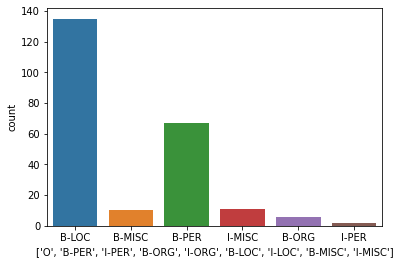

In [ ]:
print("Scores:", df_it['score'].describe())
print("Ner Predictions:", df_it['entity'].describe())
print("Number of tags: {}".format(len(df_it.entity.unique())))
print(df_it.entity.value_counts())

label_list = ['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']
sns.countplot(df_it.entity)
plt.xlabel(label_list);

### bert-NER-base-multi

In [ ]:
# model base-multi
df_m = ner_inferences(model_='/content/drive/MyDrive/bert-NER-base-multi/checkpoint-11050', 
                      tokenizer_ = AutoTokenizer.from_pretrained("/content/drive/MyDrive/bert-NER-base-multi/checkpoint-11050"))
print(df_m)

{'entity': 'B-LOC', 'score': 0.9977494, 'index': 1, 'word': 'Venezia', 'start': 0, 'end': 7}
{'entity': 'B-ORG', 'score': 0.9973935, 'index': 1, 'word': 'Tre', 'start': 0, 'end': 3}
{'entity': 'B-LOC', 'score': 0.93849885, 'index': 1, 'word': 'Lucca', 'start': 0, 'end': 5}
{'entity': 'B-LOC', 'score': 0.9933298, 'index': 1, 'word': 'Toscana', 'start': 0, 'end': 7}
{'entity': 'B-PER', 'score': 0.64657354, 'index': 1, 'word': 'Marcia', 'start': 0, 'end': 6}
{'entity': 'B-PER', 'score': 0.86491424, 'index': 1, 'word': 'Davis', 'start': 0, 'end': 5}
{'entity': 'B-LOC', 'score': 0.99422187, 'index': 1, 'word': 'Svizzera', 'start': 0, 'end': 8}
{'entity': 'B-LOC', 'score': 0.9991646, 'index': 1, 'word': 'Belgio', 'start': 0, 'end': 6}
{'entity': 'B-LOC', 'score': 0.9977969, 'index': 1, 'word': 'Roma', 'start': 0, 'end': 4}
{'entity': 'B-PER', 'score': 0.96175116, 'index': 1, 'word': 'Pol', 'start': 0, 'end': 3}
{'entity': 'B-LOC', 'score': 0.9869494, 'index': 1, 'word': 'E', 'start': 0, 'end

In [ ]:
th = 0.600000  
"""words with accuracy lower than 60%"""
mistakes = df_m.loc[df_m["score"] <= th]["word"]
print(mistakes)

20     Natural
22         Pot
25      Hubble
26     Pioneer
27     Pioneer
29           G
33           G
39     Simmons
50          Mu
85       Tommy
88          Bo
97       Tommy
105      Terme
106     Marcel
112       John
113    Neumann
114       John
125        Men
141      Jimmy
148          C
151        Uma
152        Uma
154        Uma
157        Cup
164       Rain
165      Denis
170      Space
183       John
Name: word, dtype: object


In [ ]:
print(df_m['score'].describe())

count    205.000000
mean       0.826383
std        0.184094
min        0.289068
25%        0.675607
50%        0.914572
75%        0.993710
max        0.999391
Name: score, dtype: float64


## sentences predicted by the acoustic model

We test the fine-tuned models for NER on the sentences predicted by an acoustic model fine-tuned for ASR and a 5-gram language model 

The acoustic model is wav2vec2-xls-r-300m fine-tuned on 25 hours of Italian data from the Corpus 6.1 of [Mozilla Common Voice](https://commonvoice.mozilla.org/)

The 5-gram language model was built using the library [KenLM](https://github.com/kpu/kenlm) and trained with the italian Corpus of the Dataset [europarl bilingual](https://opus.nlpl.eu/Europarl.php)  

We load the predictions and the references sentences from a CSV file 

In [ ]:
pred_sent= pd.read_csv('/CSV_ITA_INFERENCES_WITH_LM.csv', sep=",")
pred_sent

,Unnamed: 0,predictions,reference
0,0,mi hanno fatto un'offerta che non poteva propr...,mi hanno fatto un'offerta che non potevo propr...
1,1,le donne portano disgrazie,le donne portano disgrazia
2,2,vorrei un bel pezzo riciaccolata,vorrei un bel pezzo di cioccolata
3,3,fare lo sgambetto,fare lo sgambetto
4,4,cogliere l'attimo fulgente,cogliere l'attimo fuggente
...,...,...,...
778,778,ogni funzione armonica soddisfa la proprietà d...,ogni funzione armonica soddisfa la proprietà d...
779,779,pure a taranto c'erano saline e culto di ercole,pure a taranto c'erano saline e culto di ercole
780,780,il disco de fiere è uscito nello stesso anno,il disco the fire è uscito nello stesso anno
781,781,suo fratello libio gioco peranto la maglia del...,suo fratello livio giocò in serie a con la mag...


### bert-NER-base-ita

In [ ]:
list_entity=[]
list_score=[]
list_word=[]
# model n°2
ner_pipeline = pipeline(task='ner', model='/bert-NER-base-ita/checkpoint-11050', tokenizer = AutoTokenizer.from_pretrained("/content/drive/MyDrive/MACHINE_LEARNING/SoSe_project/wikineural-ita-ner2/checkpoint-11050") )
for line in pred_sent['predictions']:
  classifications = ner_pipeline(line)
  if len(classifications) == 0:
    pass
  else:
    print(classifications)
    for el in classifications:
      list_word.append(el['word'])
      list_entity.append(el['entity'])
      list_score.append(el['score'])
      #print(el[0])
      
d={"word": list_word, "entity": list_entity, "score": list_score }

df = pd.DataFrame(d)
df.to_csv("/out_bert_NER_base_ita.csv")
      

[{'entity': 'B-LOC', 'score': 0.8009236, 'index': 5, 'word': 'milan', 'start': 9, 'end': 14}]
[{'entity': 'B-LOC', 'score': 0.5331792, 'index': 2, 'word': 'euro', 'start': 3, 'end': 7}]
[{'entity': 'B-LOC', 'score': 0.58731675, 'index': 1, 'word': 'ara', 'start': 0, 'end': 3}, {'entity': 'B-LOC', 'score': 0.4539233, 'index': 2, 'word': '##t', 'start': 3, 'end': 4}, {'entity': 'I-LOC', 'score': 0.88601255, 'index': 3, 'word': '##wan', 'start': 4, 'end': 7}, {'entity': 'I-LOC', 'score': 0.9637192, 'index': 4, 'word': '##ur', 'start': 7, 'end': 9}]
[{'entity': 'B-LOC', 'score': 0.776225, 'index': 7, 'word': 'euro', 'start': 34, 'end': 38}]
[{'entity': 'B-PER', 'score': 0.6514653, 'index': 5, 'word': 'ges', 'start': 19, 'end': 22}]
[{'entity': 'B-LOC', 'score': 0.8536575, 'index': 4, 'word': 'ro', 'start': 16, 'end': 18}]
[{'entity': 'B-PER', 'score': 0.97206074, 'index': 4, 'word': 'de', 'start': 14, 'end': 16}, {'entity': 'I-PER', 'score': 0.7123111, 'index': 5, 'word': 'vince', 'start':

In [ ]:
df= pd.read_csv('/out_bert_NER_base_ita.csv', sep=",")
df

,Unnamed: 0,word,entity,score
0,0,milan,B-LOC,0.800924
1,1,euro,B-LOC,0.533179
2,2,ara,B-LOC,0.587317
3,3,##t,B-LOC,0.453923
4,4,##wan,I-LOC,0.886013
...,...,...,...,...
71,71,mo,B-PER,0.803371
72,72,euro,B-LOC,0.943859
73,73,nuova,B-LOC,0.720788
74,74,val,B-LOC,0.834111


In [ ]:
th = 0.600000
"""words with accuracy lower than 60%"""
mistakes = df.loc[df["score"] <= th]["word"]
print(mistakes)

1        euro
2         ara
3         ##t
12         ro
13         ri
22         an
23    ##tonio
46        chi
67        ##y
70      ##cir
75     ##ormi
Name: word, dtype: object


Ner Predictions:
 count        76
unique        6
top       B-LOC
freq         24
Name: entity, dtype: object

Scores:
 count    76.000000
mean      0.802494
std       0.167777
min       0.418285
25%       0.687718
50%       0.837876
75%       0.952692
max       0.995457
Name: score, dtype: float64

Number of tags: 6
B-LOC     24
I-LOC     21
I-PER     17
B-PER     11
B-MISC     2
I-MISC     1
Name: entity, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


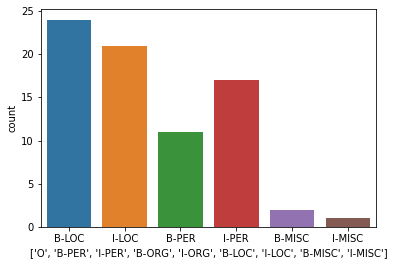

In [ ]:
# Distribution of ner tags
print("Ner Predictions:\n", df['entity'].describe())
print("\nScores:\n", df['score'].describe())

print("\nNumber of tags: {}".format(len(df.entity.unique())))
print(df.entity.value_counts())

label_list = ['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']
sns.countplot(df.entity)
plt.xlabel(label_list);

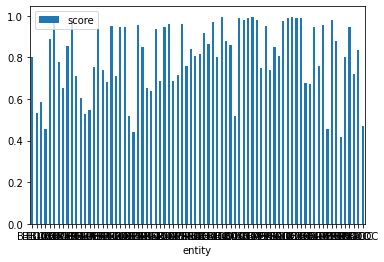

In [ ]:
import matplotlib.pyplot as plt
bar_plot= df.plot.bar(x="entity", y="score", rot=0)
bar_plot

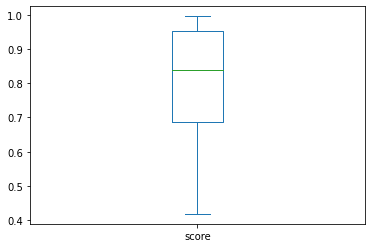

In [ ]:
box_plot = df['score'].plot.box()
box_plot

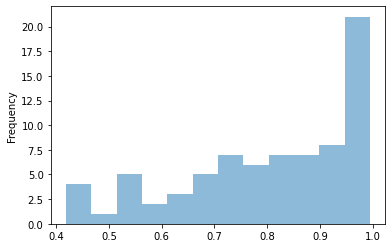

In [ ]:
hist_= df['score'].plot.hist(bins=12, alpha=0.5)
hist_

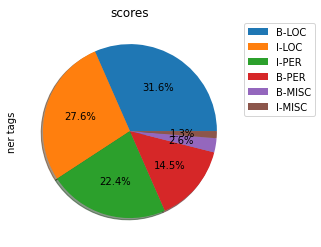

In [ ]:
label_list = ['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']
data= df.entity.value_counts()
ax = data.plot(kind="pie", y = 'score', autopct='%1.1f%%', shadow=True, legend=True, title='scores', ylabel='ner tags', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

### bert-NER-base-multi

In [ ]:
from transformers import pipeline
list_entity_1=[]
list_score_1=[]
list_word_1=[]

# model n°1
ner_pipeline = pipeline(task='ner', model='/bert-NER-base-multi/checkpoint-11050', tokenizer = AutoTokenizer.from_pretrained("/content/drive/MyDrive/MACHINE_LEARNING/SoSe_project/wikineural-ita-ner2/checkpoint-11050") )
for line in pred_sent['predictions']:
  classifications = ner_pipeline(line)
  if len(classifications) == 0:
    pass
  else:
    print(classifications)
    for el in classifications:
      list_word_1.append(el['word'])
      list_entity_1.append(el['entity'])
      list_score_1.append(el['score'])
      #print(el[0])
      
d_1={"word": list_word_1, "entity": list_entity_1, "score": list_score_1 }

df_1 = pd.DataFrame(d_1)
th = 0.600000

mistakes = df_1.loc[df_1["score"] <= th]["word"]
print(mistakes)

[{'entity': 'B-PER', 'score': 0.99951017, 'index': 4, 'word': 'disgra', 'start': 17, 'end': 23}, {'entity': 'I-PER', 'score': 0.999637, 'index': 5, 'word': '##zie', 'start': 23, 'end': 26}]
[{'entity': 'B-LOC', 'score': 0.9639602, 'index': 2, 'word': 'prenderanno', 'start': 3, 'end': 14}]
[{'entity': 'B-PER', 'score': 0.76968104, 'index': 3, 'word': 'era', 'start': 17, 'end': 20}, {'entity': 'I-PER', 'score': 0.7301461, 'index': 4, 'word': 'destinata', 'start': 21, 'end': 30}]
[{'entity': 'B-LOC', 'score': 0.9928548, 'index': 6, 'word': '##na', 'start': 30, 'end': 32}]
[{'entity': 'B-MISC', 'score': 0.94689584, 'index': 2, 'word': '##mil', 'start': 4, 'end': 7}, {'entity': 'I-MISC', 'score': 0.88661516, 'index': 3, 'word': '##lo', 'start': 7, 'end': 9}]
[{'entity': 'B-PER', 'score': 0.9687446, 'index': 3, 'word': 'nulla', 'start': 12, 'end': 17}, {'entity': 'I-PER', 'score': 0.9985403, 'index': 4, 'word': 'devi', 'start': 18, 'end': 22}, {'entity': 'I-PER', 'score': 0.9985453, 'index':

Ner Predictions:
 count       167
unique        8
top       B-PER
freq         56
Name: entity, dtype: object

Scores:
 count    167.000000
mean       0.789012
std        0.192650
min        0.287882
25%        0.609489
50%        0.848195
75%        0.956231
max        0.999637
Name: score, dtype: float64

Number of tags:
 8
B-PER     56
I-PER     54
B-LOC     32
B-MISC     7
I-MISC     7
B-ORG      6
I-ORG      3
I-LOC      2
Name: entity, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


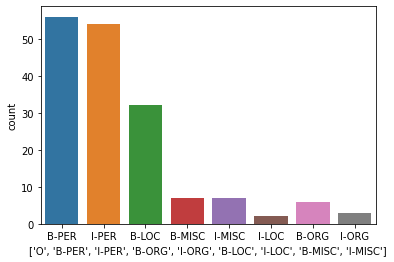

In [ ]:
print("Ner Predictions:\n", df_1['entity'].describe())
print("\nScores:\n", df_1['score'].describe())
print("\nNumber of tags:\n {}".format(len(df_1.entity.unique())))
print(df_1.entity.value_counts())

label_list = ['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']
sns.countplot(df_1.entity)
plt.xlabel(label_list);

# Results
- **the accuracy** of the models bert-NER-base-ita and bert-NER-base-multi in training on **the test set** is respectively **0.995 and 0.994.**
- on 100 sentences from the **wikineural validation set**: 
  - bert-NER-base-ita: the highest accuracy is 0.999, the lowest 0.279, for an average accuracy of 0.765 ± 0.20. 
  - bert-NER-base-multi: scored 0.999 as highest accuracy, with the lowest of 0.289, and an average accuracy is 0.826 ± 0.18. 

- on the **sentences from the ASR model** 
  - bert-NER-base-multi: average accuracy of 0.802 ± 0.17, the lowest accuracy of 0.418, and the highest of 0.995.
  - bert-NER-base-ita: average accuracy of 0.789 ± 0.19, the lowest accuracy of 0.288, and the highest of 0.999. 

The predictions of bert-NER-base-ita contain more words with accuracy under 60%, some of those are not named entities. In the predictions of bert-NER-base-multi the majority of words with accuracy below 60% are names splitted into tokens. 